In [8]:
#S5
#Cette fonction permet de passer de la configuration à l'instant t à celle  suivante (lorsqu'une horloge a sonné)
def periode(I,S,R,gamma,beta,m0):
                                     #Nous créons une liste d'horloge exponentielle pour les personnes infectées
    rvi=expon(gamma)
    horloge_i=[rvi.rvs() for i in range(I)]
    min_i=np.min(horloge_i)
    if S!=0:                                 #Nous créons une liste d'horloge exponentielle pour les personnes saines
        rvs=expon(beta*I/m0)
        horloge_s=[rvs.rvs() for s in range(S)]
    if ((S!=0) and (I!=0)):                  #Si ils y a des personnes saines et des personnes infectées nous prenons l'horloge qui a sonné en première
        min_i=np.min(horloge_i)              #Puis suivant le cas nous renvoyons le bon triplet
        min_s=np.min(horloge_s)
        if min_i<min_s:
            return [I-1,S,R+1,min_i]
        else:
            return [I+1,S-1,R,min_s]
    if S==0:                                  #S'il n'y a plus de personnes saines alors forcément le nombre d'infectés va diminué
        return [I-1,S,R+1,min_i]

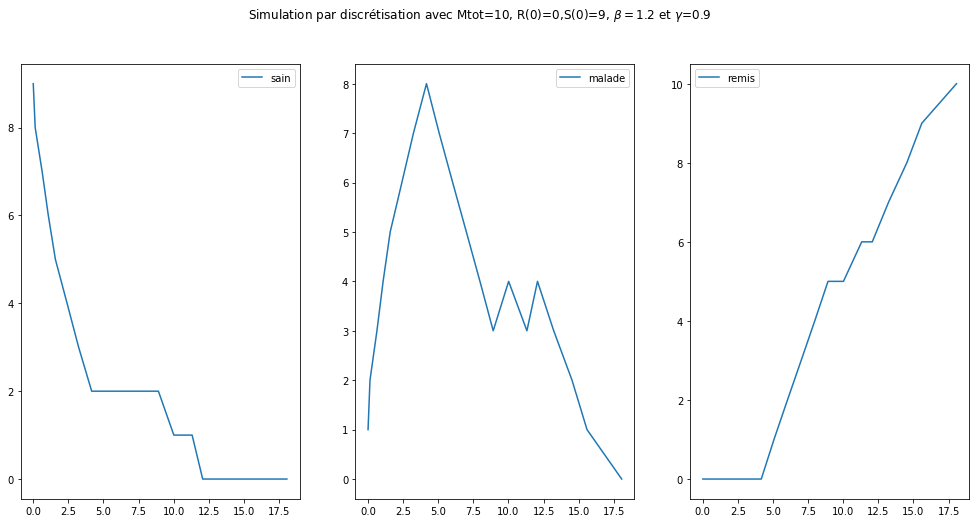

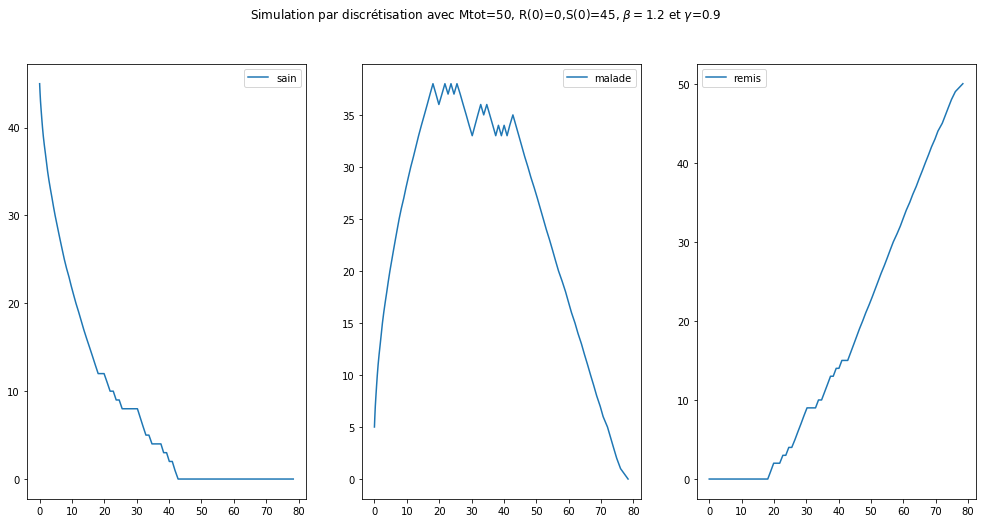

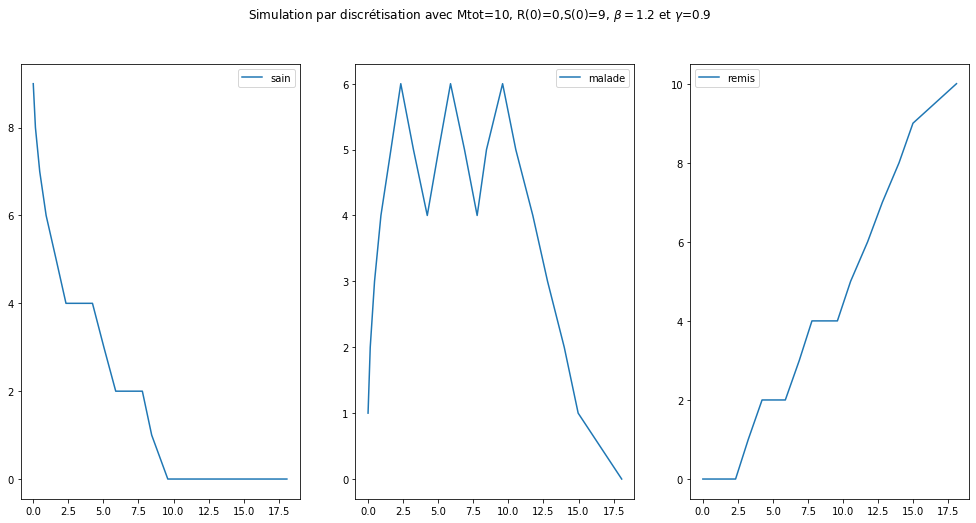

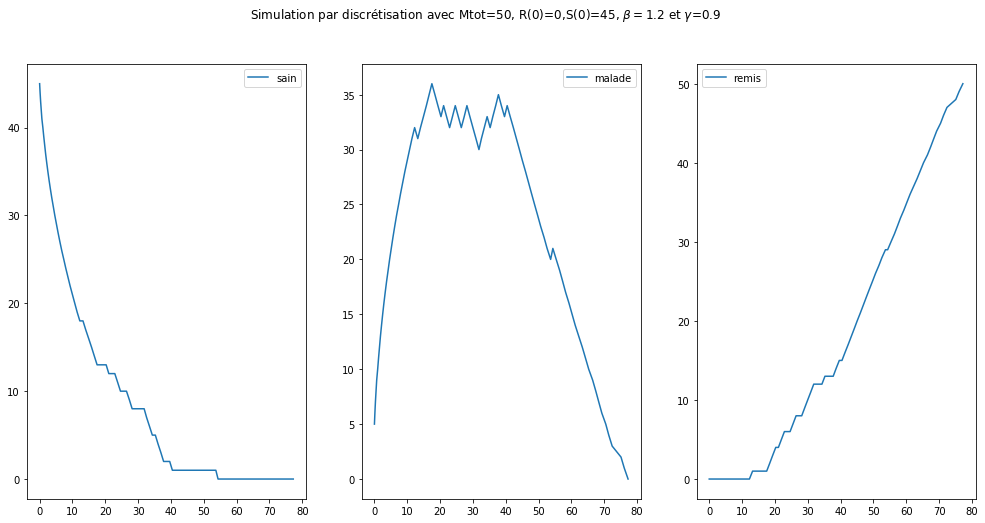

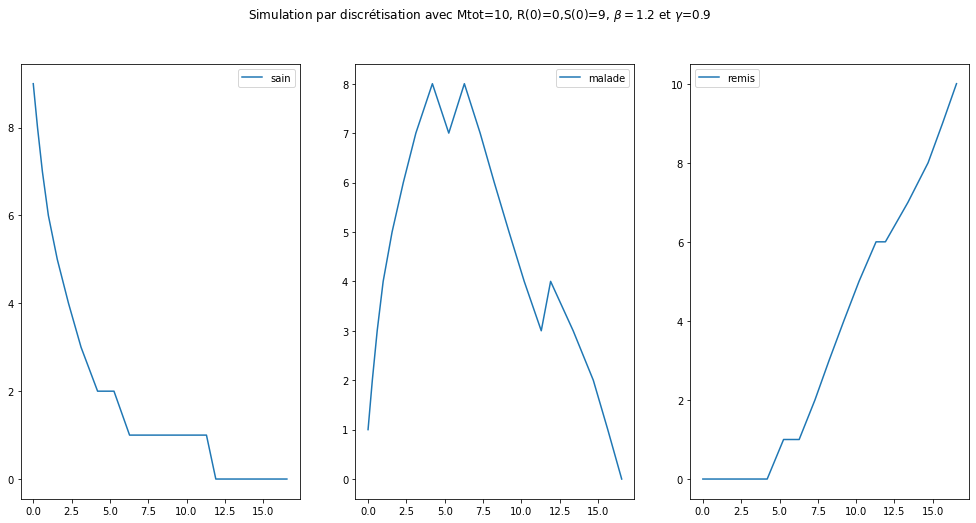

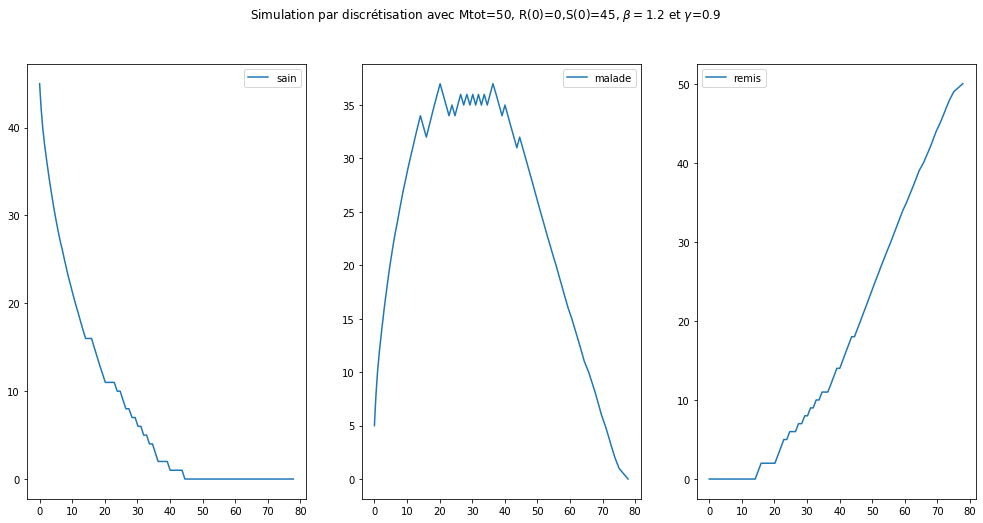

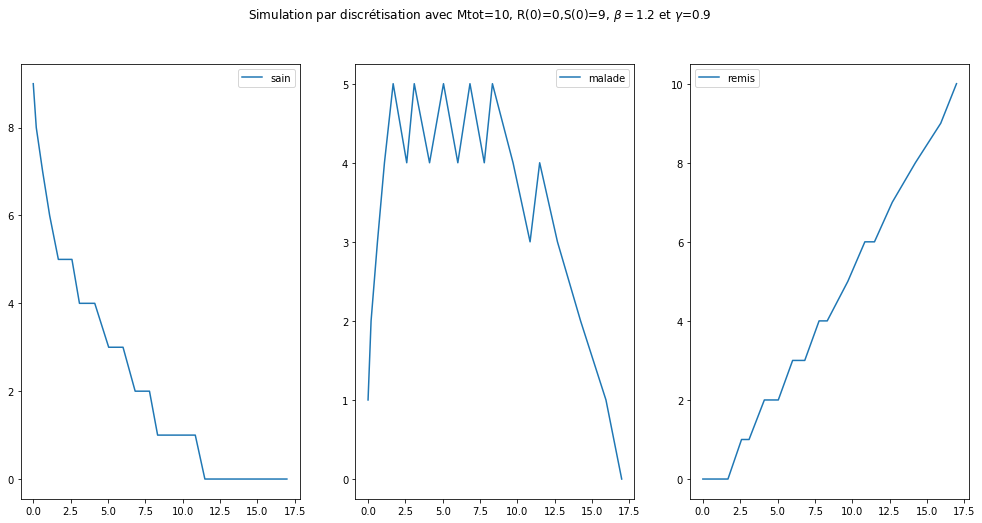

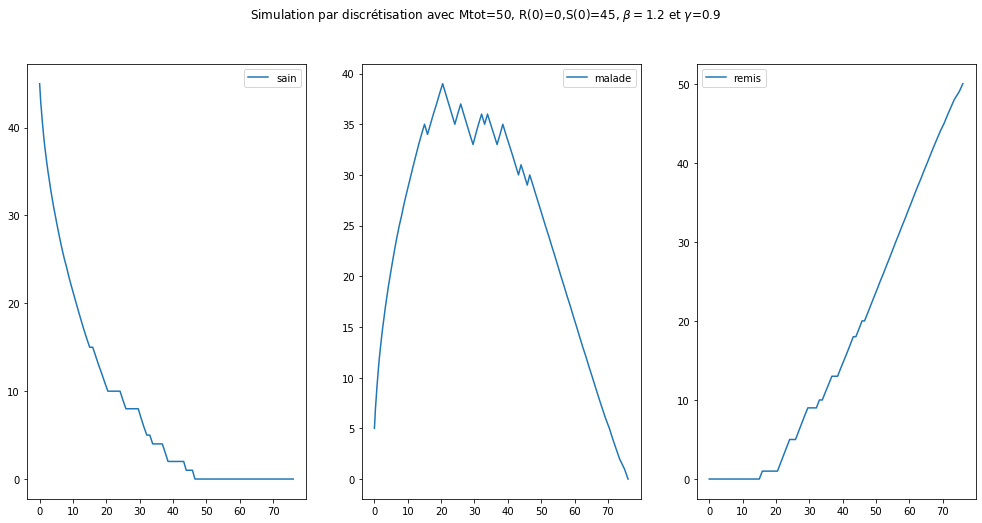

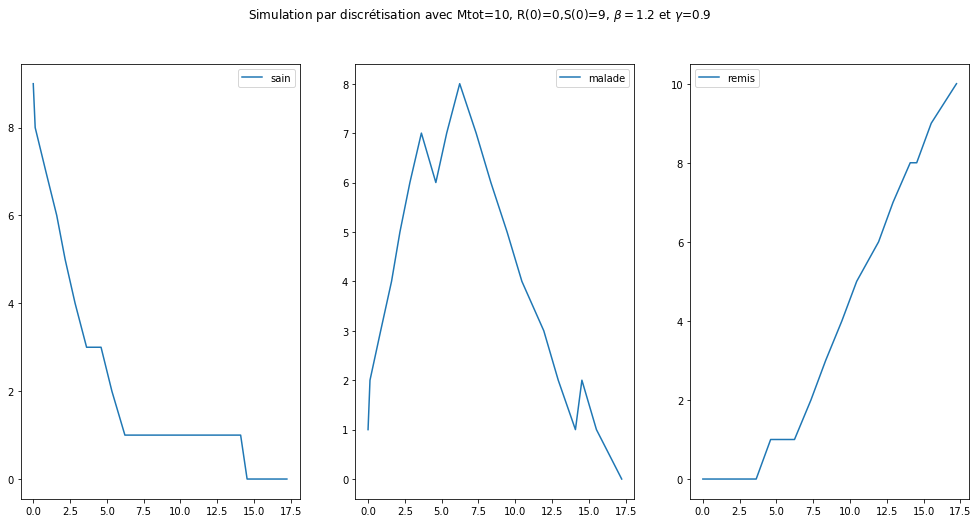

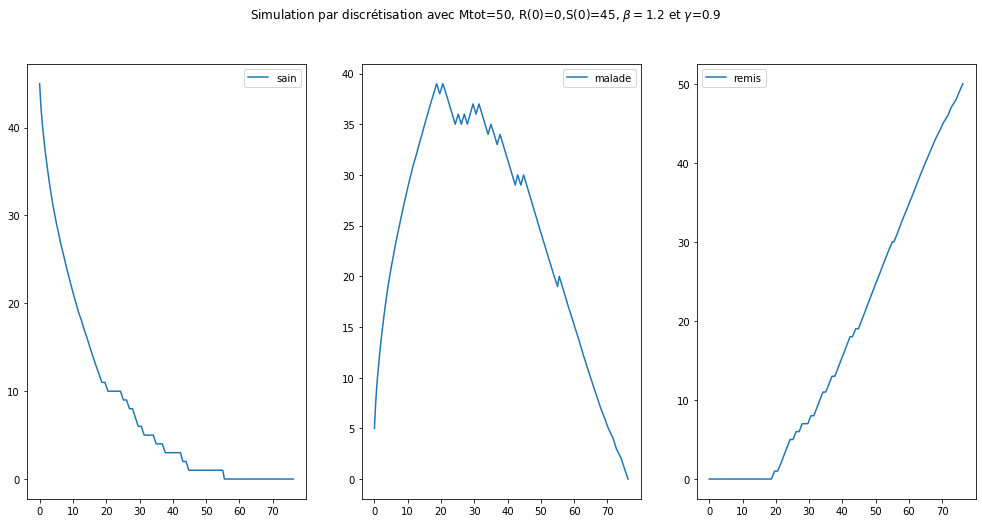

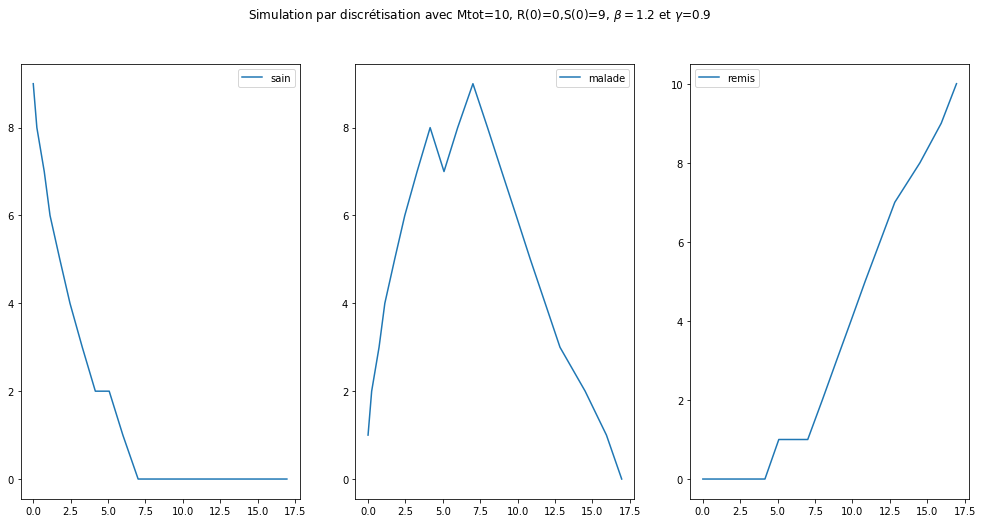

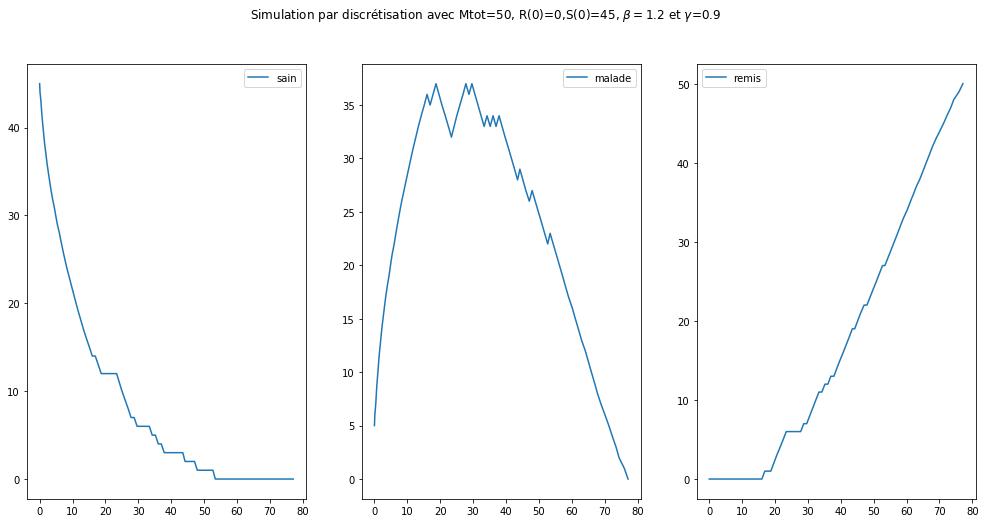

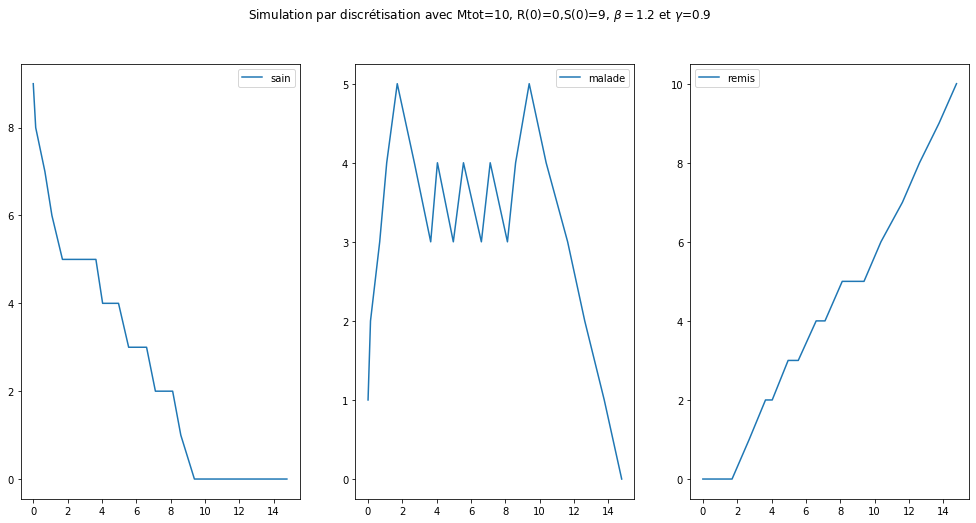

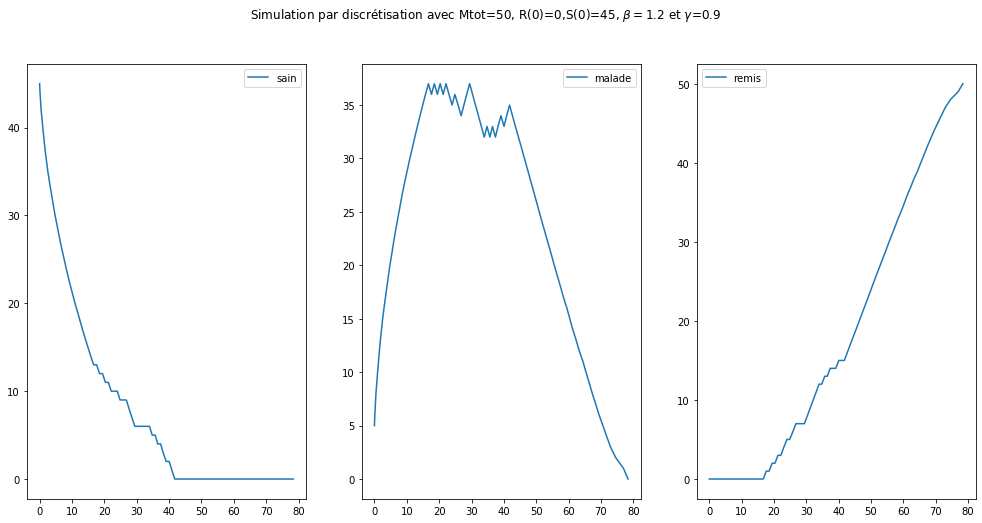

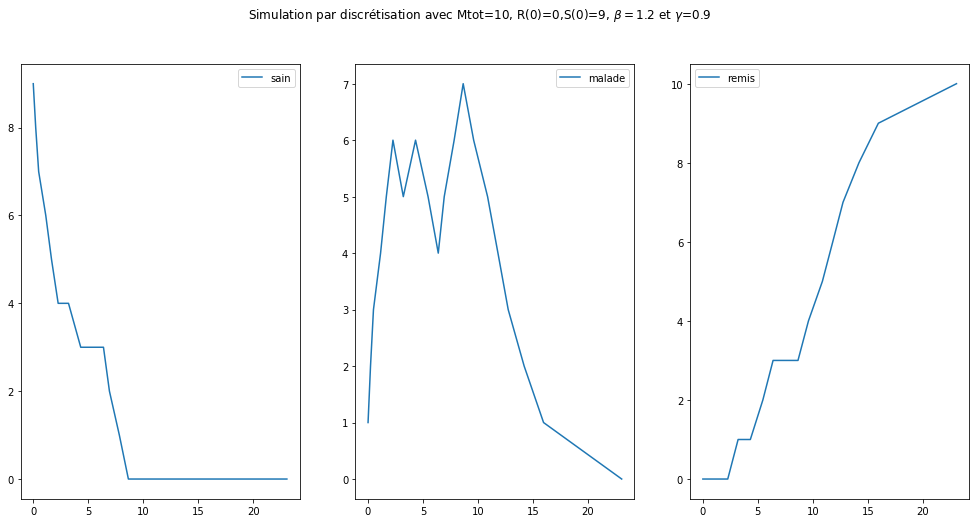

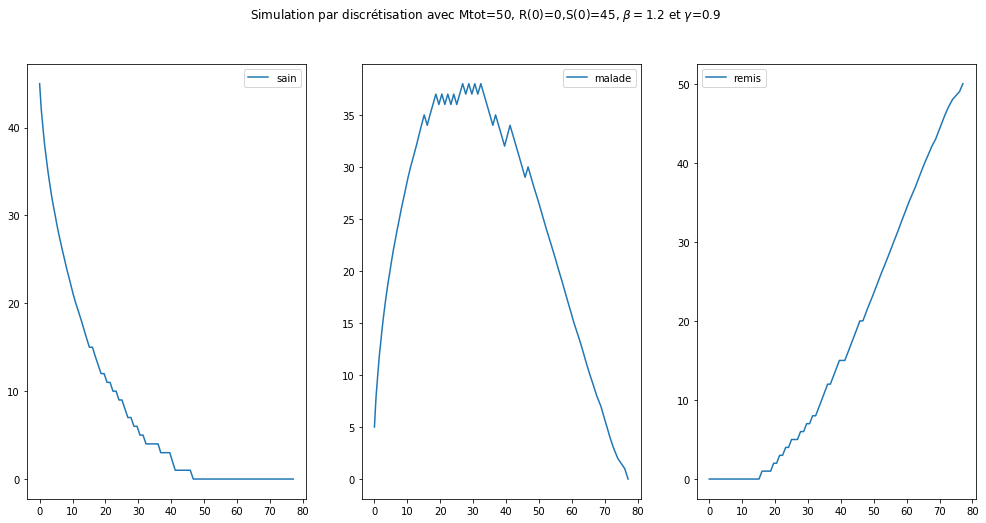

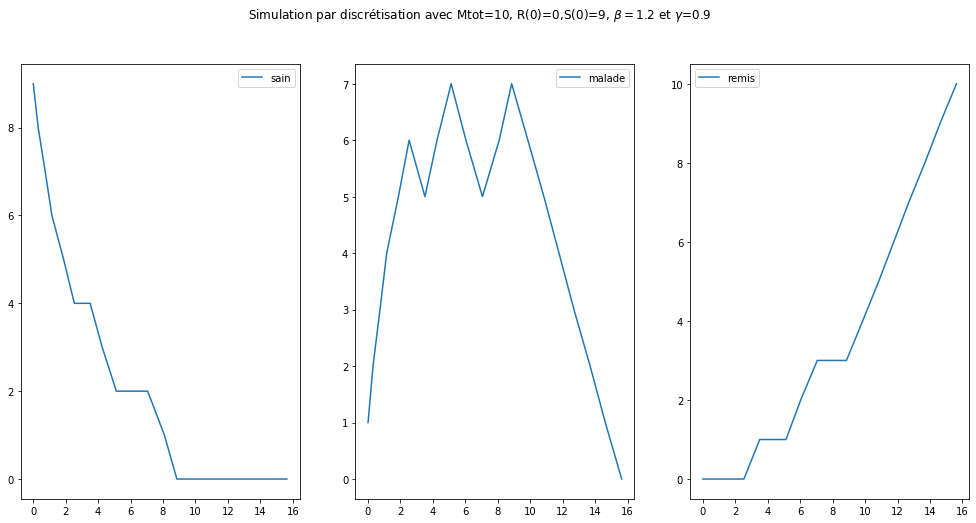

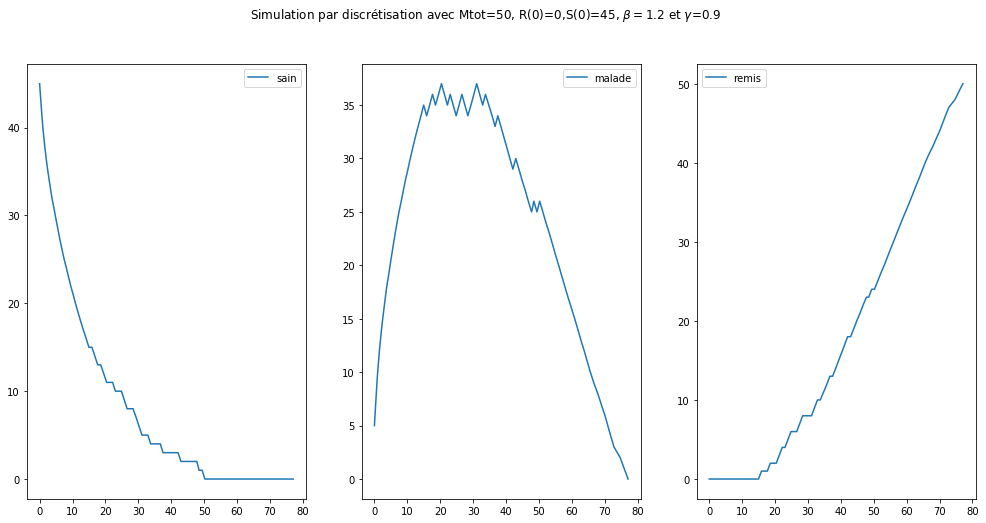

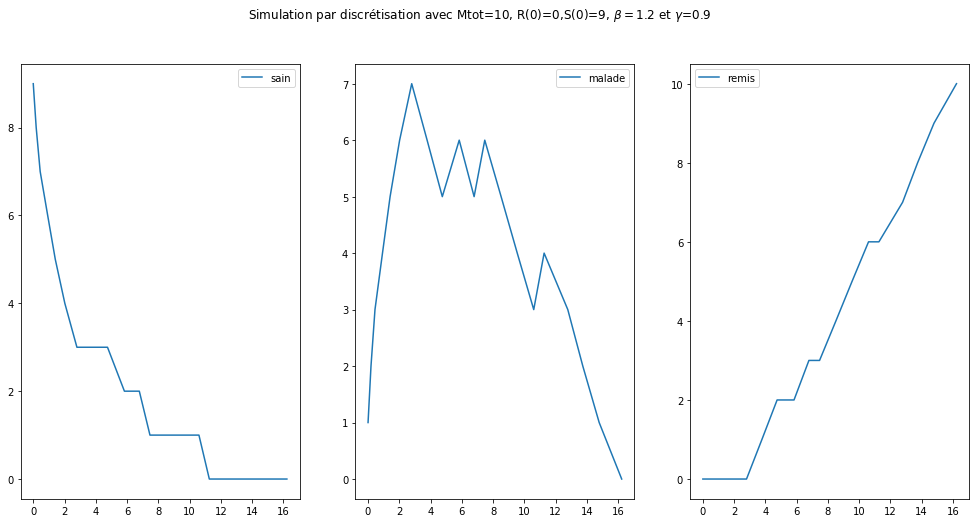

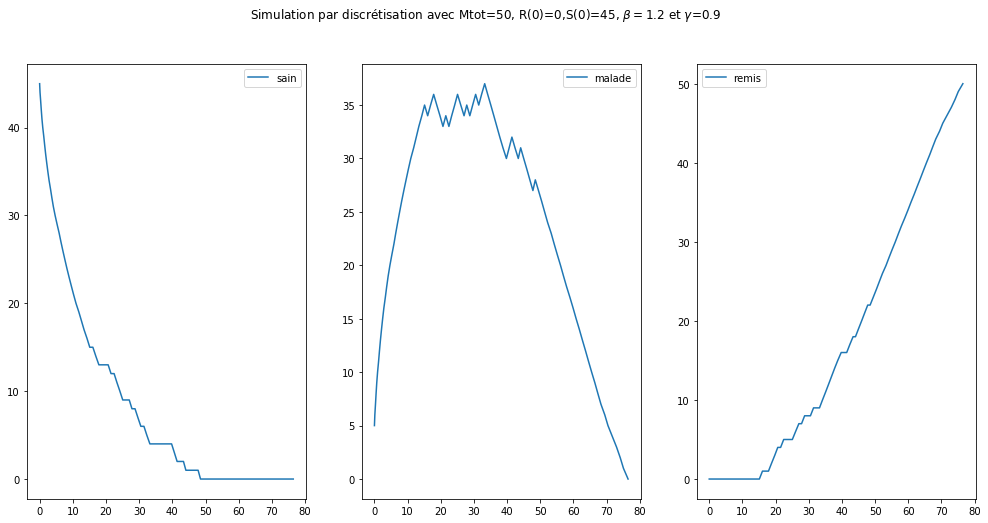

In [13]:
for i in range(10):
    for m0 in [10,50]:
        #Déclaration des paramètres initiaux
            S_sto=[0]
            I_sto=[0]
            R_sto=[0]
            beta=1.2
            gamma=0.9
            I_sto[0]=int(0.1*m0)
            S_sto[0]=int(0.9*m0)
            count=0
            X=[0]
            while R_sto[count]!=(m0-S_sto[count]):  #Tant que nous ne sommes pas arrivés à la condition pour un temps infini nous continuons
                trio=periode(I_sto[count],S_sto[count],R_sto[count],gamma,beta,m0)
                I_sto.append(trio[0])
                S_sto.append(trio[1])
                R_sto.append(trio[2])
                X.append(X[-1]+trio[3])
                count=count+1
            #X=[i for i in range (count+1)] #Axe des abscisses
            #Nous traçons les courbes
            plt.figure(figsize = (17, 8))
            plt.suptitle(fr"Simulation par discrétisation avec Mtot={m0}, R(0)=0,S(0)={S_sto[0]}, $\beta ={beta}$ et $\gamma$={gamma}")
            plt.subplot(1,3,1)
            plt.plot(X,S_sto,label="sain")
            plt.legend(loc='best')
            plt.subplot(1,3,2)
            plt.plot(X,I_sto,label="malade")
            plt.legend(loc='best')
            plt.subplot(1,3,3)
            plt.plot(X,R_sto,label="remis")
            plt.legend(loc='best')
            plt.show()

In [16]:
#Nous importons les packages dont nous aurons besoin
X=[0]
X[-1]

0

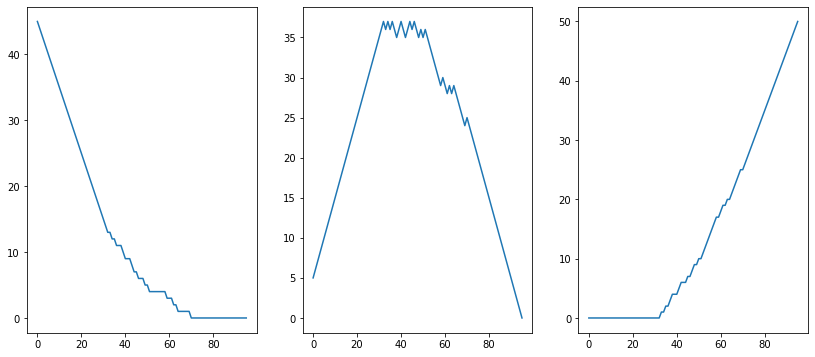

In [12]:
#m0 très grand
#Déclaration des paramètres initiaux
m=10000
S_sto=[0]
I_sto=[0]
R_sto=[0]
beta=1.2
gamma=0.9
I_sto[0]=int(0.1*m0)
S_sto[0]=int(0.9*m0)
count=0
while R_sto[count]!=(m0-S_sto[count]):                         #Tant que nous ne sommes pas arrivés à la condition pour un temps infini nous continuons
    trio=periode(I_sto[count],S_sto[count],R_sto[count],gamma,beta,m0)
    I_sto.append(trio[0])
    S_sto.append(trio[1])
    R_sto.append(trio[2])
    count=count+1
X=[i for i in range (count+1)]
#Nous traçons les courbes
plt.figure(figsize = (14, 6))
#plt.suptitle(fr"Simulation par discrétisation avec Mtot={m0}, R(0)=0,S(0)={S0}, $\beta ={beta}$ et $\gamma$={gamma}")
plt.subplot(1,3,1)
plt.plot(X,S_sto,label="sain")
plt.subplot(1,3,2)
plt.plot(X,I_sto,label="malade")
plt.subplot(1,3,3)
plt.plot(X,R_sto,label="remis")
plt.show()